# Capstone Project - Real Estate Investment in Germany
### IBM Data Science Professional Certificate on Coursera

## Table of contents 
* [Introduction: Business Problem](#introduction)
* [Data Description](#datadescription)
* [Data Preprocessing](#datapreprocessing)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)



## Introduction: Business Problem <a name="introduction"></a>

In this project, I want to find out the best city for investing in real estate market in Germany. Specifically, this report will be targeted to the stakeholders who are interested in **Residential Rental Properties** and planing to **make a profitable investment in Germany**.

Since there are too many cities, we need to narrow our research down to large cities, which, defined by German Federal Institute for Research on Building, Urban Affairs and Spatial Development, should have more than 100,000 inhabitants. We assume that large cities in the long term will generate higher ROI (return of investment) than small cities or villages.

There are a lot of important factors for a successful real estate investment, such as location, population and economy, purchase price and rental yields etc. In this project, we won’t consider some common factors, such as maintenance, insurance, tax and loan, since those costs are independent of where the property is located and therefore won’t influence our decision.

We will use our data science skills to evaluate different cities based on certain criteria. Advantages and disadvantages of each city will then be clearly expressed so that possible final decision could be made by stakeholders.

## Data Description <a name="datadescription"></a>

Based on the definition of our problem, important factors that will influence our investment decision in a certain city are: **Economic Strength, Population, Rental Yields Estimation and Average Purchase Price**.

To determine the city candidates, I used the data collected from the following sources:
* First, a property can better hold its value from a long-run perspective, if it’s located in a region, which has a strong economy and enjoys high standards of living. Wikipedia just provides a great list of all German cities by GDP (gross domestic product). So, I will use this to determine the economic strength of each city [[1]](#references)
* Secondly, a large population and continuous population growth trend will lead to large housing demand, from which the investment will benefit a lot. Therefore, it’s critical that the city candidates should keep attracting new inhabitants rather than losing some. I found a list of German cities by population from Wikipedia [[2]](#references)

To calculate ROI (return of investment), we need to know the return on the one hand, and investment on the other hand.
* For all residential rental properties in Germany, the rent index is one of the legally provided options for determining the local comparative rent in privately financed residential construction. It serves as a justification for rent increases and is drawn up by cities. If interested, you can look for details on their official websites. In this project, we will use this index to determine the possible rental yields. For simplicity, I will directly use the data on the website of Wohnung [[3]](#references)
* Purchase price depends on many factors, for example whether it’s a house or an apartment, a new construction or existing property. Still for simplicity, I will only focus on existing apartments with 3 rooms and ca. 80 m², which are listed on the website of DasHaus  [[4]](#references)

## Data Preprocessing <a name="datapreprocessing"></a>

In this section, I will collect and preprocess the data from the sources mentioned above. However, I wanted to challenge myself this time. Instead of doing copy-paste into a file in the traditional way, I wanted to scrape the data directly from HTML tables into a data frame using Python web scraping skills. For this, there are different libraries and packages in Python. For the first two data sources, I applied the more complicated method with BeautifulSoup package. For the third and fourth sources, I used requests function and transform the data into data frame using pandas. The results are four nice data frames. 

There are usually a lot of useless information like hyperlinks or pictures on websites. I tried to only extract the necessary data, in order to minimize efforts of data cleaning at a later stage. After analyzing the source code of the page in HTML, I recognized how the code structure looks like and where the desired table is located. In order to get clean data for later analysis, I made some effort to convert data types, select columns, reset index and adjust texts etc. The final result is a list of cities by their GDP in billion Euro:

In [1]:
!pip install bs4 #!pip install requests

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=57c2dbdecd108991274aaca61c2192cab02537b18ec39502ee93a058e9ba7967
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 
import requests  
import lxml.html as lh 
import pandas as pd

In [10]:
#this is wikipedia page
url='https://de.wikipedia.org/wiki/Liste_der_deutschen_St%C3%A4dte_nach_Bruttoinlandsprodukt' 

#Creating a BeautifulSoup (soup)object 
soup = BeautifulSoup(urlopen(url))

#View how the tags are nested in the document
#print(soup.prettify())

gdp_data = pd.DataFrame(columns=["City", "GDP_in_billion_€"])

for items in soup.find('table',{'class':'wikitable sortable'}).find_all('tr')[1:]: # with [1:] to get rid of double headers
    data =  items.find_all(['th', 'td'])
    try:
        city = data[1].text.strip()
        gdp = data[3].text.replace(r".",'')
    except IndexError:pass
    gdp_data = gdp_data.append({"City":city, "GDP_in_billion_€":gdp}, ignore_index=True)

# change index to "City"
gdp_data.set_index('City', inplace=True)

# change data type to integer in order to draw graphes later
gdp_data = gdp_data.astype('int')

# correct two small errors in city name
gdp_data.rename(index={'Region Hannover':'Hannover'}, inplace=True)

gdp_data.dtypes
gdp_data.head(10)

,GDP_in_billion_€
City,
Berlin,145547
Hamburg,118912
München,116647
Frankfurt am Main,70639
Köln,64536
Stuttgart,57369
Hannover,52655
Düsseldorf,50429
Nürnberg,31374


More or less in the same way, I extracted the population data from Wikipedia. 

In [11]:
#this is the wikipedia page
url2='https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland' 

#Creating a BeautifulSoup (soup)object 
soup2 = BeautifulSoup(urlopen(url2))

population_data = pd.DataFrame(columns=["City", "Census_2000", "Census_2019", "Land_Area_in_km²"])

for items in soup2.find('table',{'class':'wikitable sortable zebra mw-datatable'}).find_all('tr')[2:]: # there are two rows of header
    data =  items.find_all('td')
    if (data != []):               # necessary step to remove errors like 'index out of range' or 'name ... not defined'
        city = data[1].text        # Attention: city name contains annoying superscript numbers
        superscript = ["1", "2","3","4","5","6","7", "8","9", "10","11", ","] # tricky to remove all superscript numbers following real text
        for character in superscript:
            city = city.replace(character, "")
        c2000 = data[8].text.replace(r".",'')
        c2019 = data[11].text.replace(r".",'')
        area = data[12].text.replace(r",",'.')
    population_data = population_data.append({"City":city, "Census_2000":c2000, "Census_2019":c2019, "Land_Area_in_km²":area}, ignore_index=True)
    
# change index to "City"
population_data.set_index('City', inplace=True)

# change data type to integer or float in order to draw graphes later
population_data = population_data.astype({"Census_2000": 'int', "Census_2019": 'int', "Land_Area_in_km²": 'float'})

population_data.head(10)

,Census_2000,Census_2019,Land_Area_in_km²
City,,,
Berlin,3382169,3669491,891.68
Hamburg,1715392,1847253,755.22
München,1210223,1484226,310.70
Köln,962884,1087863,405.02
Frankfurt am Main,648550,763380,248.31
Stuttgart,583874,635911,207.35
Düsseldorf,569364,621877,217.41
Leipzig,493208,593145,297.80
Dortmund,588994,588250,280.71


For the data about property purchase price and rental yields, I simply used Pandas to read the table from the websites into data frames:

In [12]:
#this is the DasHaus page
url3='https://www.haus.de/geld-recht/immobilienpreise-deutschland-vergleich-2019' 

# necessary for real_html
data3  = requests.get(url3).text

soup3 = BeautifulSoup(data3,"html5lib")

tables = soup3.find_all('table')

#len(tables) # result '1'
#tables[0].prettify()

# read HTML table content
purchase_price = pd.read_html(str(tables), thousands='.')[0] # Attention: German numbers with "." as tausend mark, should be corrected

purchase_price.head(10)

#purchase_price.dtypes

,Unnamed: 0,"Grundstücke in Euro/Quadrat- meter (mittlere bis gute Wohnlage, 300 bis 800 Quadrat- meter)","Eigentumswoh- nungen neu in Euro/Quadrat- meter (3 Zim- mer, circa 80 Quadratmeter)","Eigentumswoh- nungen im Be- stand Euro/ Quadratmeter Wohnfläche (3 Zimmer, circa 80 Quadratmeter Wohnfläche)","Freistehendes Eigenheim im Bestand in Euro, circa 120 Quadratmeter Wohnfläche"
0,Baden- Württemberg,NaN,NaN,NaN,NaN
1,Stuttgart,1400.0,6700.0,4100.0,1000.0
2,Heidelberg,850.0,4500.0,3800.0,840.0
3,Karlsruhe,480.0,4300.0,2600.0,600.0
4,Ulm,400.0,5000.0,3250.0,650.0
5,Bayern,NaN,NaN,NaN,NaN
6,München,2300.0,8100.0,6900.0,1500.0
7,Regensburg,820.0,5000.0,3750.0,850.0
8,Nürnberg,720.0,4700.0,3600.0,600.0
9,Würzburg,430.0,4400.0,2950.0,500.0


In [13]:
#change column names
purchase_price.rename(columns={'Unnamed: 0':'City', 'Grundstücke in  Euro/Quadrat-  meter (mittlere  bis gute  Wohnlage, 300  bis 800 Quadrat-  meter)':'Price of land in €/m²','Eigentumswoh-  nungen neu in  Euro/Quadrat-  meter (3 Zim-  mer, circa 80  Quadratmeter)':'Price of newly-built apartment in €/m²','Eigentumswoh-  nungen im Be-  stand Euro/  Quadratmeter  Wohnfläche (3  Zimmer, circa 80  Quadratmeter  Wohnfläche)':'Price_of_existing_apartment_in_€/m²', 'Freistehendes  Eigenheim im  Bestand in  Euro, circa  120  Quadratmeter  Wohnfläche':'unoccupied apartments'}, inplace=True)

# drop two unnecessary columns
purchase_price.drop(['Price of land in €/m²','Price of newly-built apartment in €/m²','unoccupied apartments'], axis=1, inplace=True)

# drop unnecessary rows with NaN
purchase_price = purchase_price.dropna()

#set city as index
purchase_price.set_index('City', inplace=True)

purchase_price = purchase_price.astype({"Price_of_existing_apartment_in_€/m²": 'int'})

# correct two small errors in city name
purchase_price.rename(index={'Frankfurt am  Main':'Frankfurt am Main','Frankfurt an der  Oder':'Frankfurt an der Oder','Offenbach':'Offenbach am Main', 'Halle an der  Saale':'Halle an der Saale'}, inplace=True)


purchase_price.head(10)

,Price_of_existing_apartment_in_€/m²
City,
Stuttgart,4100
Heidelberg,3800
Karlsruhe,2600
Ulm,3250
München,6900
Regensburg,3750
Nürnberg,3600
Würzburg,2950
Dresden,1750


In [14]:
#this is the Wohnung.com page
url4='https://www.wohnung.com/mietpreise' 

# necessary for real_html
data4  = requests.get(url4).text

soup4 = BeautifulSoup(data4,"html5lib")

tables = soup4.find_all('table')

# len(tables) # result '1'

#tables[0].prettify()

rental_yield = pd.read_html(str(tables[0]), decimal=',')[0]

rental_yield.head(10)

,Unnamed: 0,Stadt,Ø Mietpreis pro m²
0,1,Norderney,"18,72€"
1,2,Langeoog,"18,57€"
2,3,München,"16,64€"
3,4,Grünwald,"16,06€"
4,5,Unterföhring,"14,80€"
5,6,Mühlenbach,"14,54€"
6,7,Gräfelfing,"14,12€"
7,8,Unterhaching,"13,93€"
8,9,Baierbrunn,"13,72€"
9,10,Ottobrunn,"13,47€"


In [15]:
# drop two unnecessary columns
rental_yield.drop(['Unnamed: 0'], axis=1, inplace=True)

#change column names
rental_yield.rename(columns={'Stadt':'City','Ø Mietpreis pro m²':'Rental_income_per_m²'}, inplace=True)

#set city as index
rental_yield.set_index('City', inplace=True)

# remove '€' and ',' in the string
rental_yield['Rental_income_per_m²'] = rental_yield['Rental_income_per_m²'].str.replace(r'€', '')
rental_yield['Rental_income_per_m²'] = rental_yield['Rental_income_per_m²'].str.replace(r',', '.')

# set rental income as float
rental_yield = rental_yield.astype({"Rental_income_per_m²": 'float'})

# correct two small errors in city name
rental_yield.rename(index={'Frankfurt (Oder)':'Frankfurt an der Oder','Halle (Saale)':'Halle an der Saale'}, inplace=True)

rental_yield.head(10)

,Rental_income_per_m²
City,
Norderney,18.72
Langeoog,18.57
München,16.64
Grünwald,16.06
Unterföhring,14.80
Mühlenbach,14.54
Gräfelfing,14.12
Unterhaching,13.93
Baierbrunn,13.72


## Methodology <a name="methodology"></a>

As mentioned above, there are four important factors for our investment decision: Economic Strength, Population, Rental Yields Estimation and Average Purchase Price. All the data are now stored in corresponding data frames: gdp_data, population_data, purchase_price and rental_yield. In this part, I will describe the data analysis step by step and show how I used the data to get the final result.

First of all, we need to narrow down city candidates based on GDP and population data. GDP ranking list is already prepared. It’s pretty clear, which cities are economically stronger.

In [22]:
import copy
gdp= copy.deepcopy(gdp_data)
gdp = gdp.sort_values(by=['GDP_in_billion_€'], ascending=False).head(50)
gdp.head()

,GDP_in_billion_€
City,
Berlin,145547
Hamburg,118912
München,116647
Frankfurt am Main,70639
Köln,64536


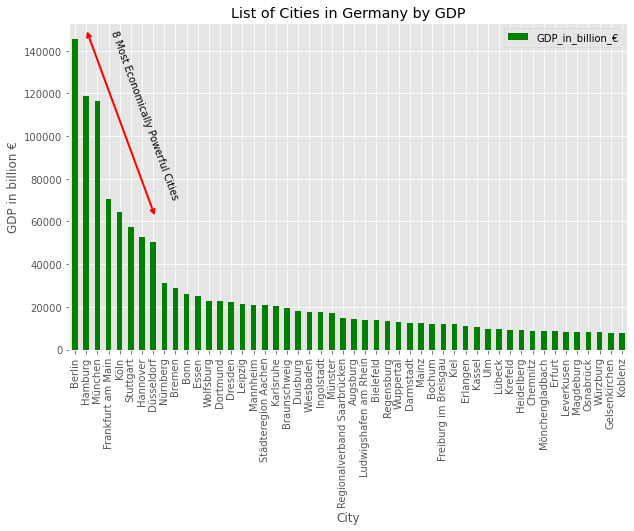

In [17]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
#print ('Matplotlib version: ', mpl.__version__) 

gdp = gdp.plot(kind='bar',color='g', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('GDP in billion €') # add y-label to the plot
plt.title('List of Cities in Germany by GDP') # add title to the plot

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(7.2, 62000),             # place head of the arrow at point
             xytext=(1, 150000),         # place base of the arrow at point
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='red', lw=2)
            )

# Annotate Text
plt.annotate('8 Most Economically Powerful Cities', # text to display
             xy=(3, 70000),                    # start the text at at point 
             rotation= 290,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


plt.show()

Concerning the population data, we need to consider both the current population and the growth trend, since there are many large cities whose population however shrink a lot in the last few decades, for example those cities in Ruhr (a traditional heavy industry region in West Germany). In the following chart on the right, we can see that about 50 metropolitan cities keep attracting new people in the last 20 years, while the rest of them are all losing people. Therefore, this overview helps us set proper conditions to kick those shrinking cities out of our research scope and only focus on cities whose population is not only large, but also is still growing very fast.

In [23]:
import copy
population_pre = copy.deepcopy(population_data)
population_pre['Population_Density'] = (population_pre["Census_2019"]/population_pre["Land_Area_in_km²"]).round(1)
population_pre['Population_Development_in_Percent'] = ((population_pre["Census_2019"]-population_pre["Census_2000"])*100/population_pre["Census_2000"]).round(1)
population_pre.head(10)

,Census_2000,Census_2019,Land_Area_in_km²,Population_Density,Population_Development_in_Percent
City,,,,,
Berlin,3382169,3669491,891.68,4115.3,8.5
Hamburg,1715392,1847253,755.22,2446.0,7.7
München,1210223,1484226,310.70,4777.0,22.6
Köln,962884,1087863,405.02,2685.9,13.0
Frankfurt am Main,648550,763380,248.31,3074.3,17.7
Stuttgart,583874,635911,207.35,3066.8,8.9
Düsseldorf,569364,621877,217.41,2860.4,9.2
Leipzig,493208,593145,297.80,1991.8,20.3
Dortmund,588994,588250,280.71,2095.6,-0.1


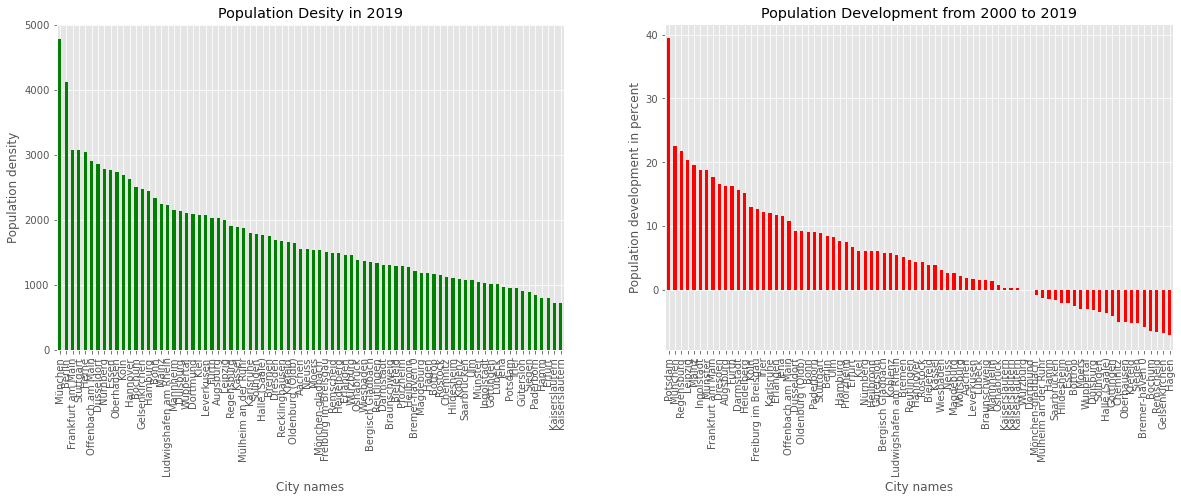

In [19]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Bar chart
population_pre['Population_Density'].sort_values(ascending=False).head(80).plot(kind='bar',color='g', figsize=(20, 6),ax=ax0) # add to subplot 1
ax0.set_title('Population Desity in 2019')
ax0.set_xlabel('City names')
ax0.set_ylabel('Population density')

# Subplot 2: Bar chart
population_pre['Population_Development_in_Percent'].sort_values(ascending=False).head(80).plot(kind='bar', color='r',  figsize=(20, 6),ax=ax1) # add to subplot 1
ax1.set_title('Population Development from 2000 to 2019')
ax1.set_xlabel('City names')
ax1.set_ylabel('Population development in percent')

plt.show()

In [24]:
population_pre = population_pre[(population_pre['Population_Development_in_Percent']>4)&(population_pre['Population_Density']>1500)]

# only keep useful columns
population =  copy.deepcopy(population_pre[['Population_Density','Population_Development_in_Percent']])

population.head()

,Population_Density,Population_Development_in_Percent
City,,
Berlin,4115.3,8.5
Hamburg,2446.0,7.7
München,4777.0,22.6
Köln,2685.9,13.0
Frankfurt am Main,3074.3,17.7


We’ve already got the purchase prices and rental yields from the data preprocessing step. After dividing return by investment, we got ROI. In the following data frame, I consolidated all the data together: 

In [25]:
# join GDP and population data 
city = pd.merge(gdp, population, left_on='City', right_on='City', how='outer')

# join purchase price and rental yield
ROI = pd.merge(purchase_price, rental_yield, left_on='City', right_on='City', how='outer')
ROI['ROI_in_‰'] = (ROI['Rental_income_per_m²']/ROI['Price_of_existing_apartment_in_€/m²']*1000).round(2)

# join city candidates und ROI
city_ROI = pd.merge(city, ROI, left_on='City', right_on='City', how='outer')
city_ROI.head()

,GDP_in_billion_€,Population_Density,Population_Development_in_Percent,Price_of_existing_apartment_in_€/m²,Rental_income_per_m²,ROI_in_‰
City,,,,,,
Berlin,145547.0,4115.3,8.5,3850.0,9.89,2.57
Hamburg,118912.0,2446.0,7.7,4500.0,11.25,2.50
München,116647.0,4777.0,22.6,6900.0,16.64,2.41
Frankfurt am Main,70639.0,3074.3,17.7,5500.0,12.66,2.30
Köln,64536.0,2685.9,13.0,3300.0,10.68,3.24


With all needed information in one data frame, I was able to explore the data a little and tried to find some connection between different factors. In the following scatter plots, we can for example see a positive correlation between population density and property price as well as between population density and rental income. 

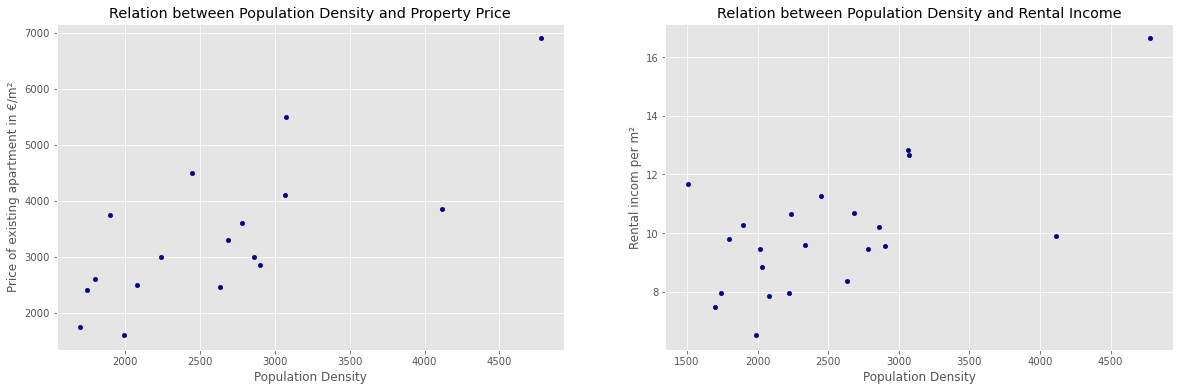

In [26]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Scatter chart
city_ROI.plot(kind='scatter', x='Population_Density', y='Price_of_existing_apartment_in_€/m²', figsize=(20, 6), color='darkblue', ax=ax0)
ax0.set_title('Relation between Population Density and Property Price')
ax0.set_xlabel('Population Density')
ax0.set_ylabel('Price of existing apartment in €/m²')

# Subplot 2: Scatter chart
city_ROI.plot(kind='scatter', x='Population_Density', y='Rental_income_per_m²', figsize=(20, 6), color='darkblue', ax=ax1)
ax1.set_title('Relation between Population Density and Rental Income')
ax1.set_xlabel('Population Density')
ax1.set_ylabel('Rental incom per m²')

plt.show()

## Results and Discussion <a name="results"></a>

After all those steps of data collection, preprocessing and exploratory analysis, we are finally there to show the result. In the following table, all the candidates are listed, which fulfill our criteria: economically the strongest cities in Germany with the largest population and fastest growth trend.

In [27]:
# join GDP and population data 
city_inner = pd.merge(gdp, population, left_on='City', right_on='City', how='inner')

# join purchase price and rental yield
ROI_inner = pd.merge(purchase_price, rental_yield, left_on='City', right_on='City', how='inner')
ROI_inner['ROI_in_‰'] = (ROI_inner['Rental_income_per_m²']/ROI_inner['Price_of_existing_apartment_in_€/m²']*1000).round(2)

# join city candidates und ROI
city_ROI_inner = pd.merge(city_inner, ROI_inner, left_on='City', right_on='City', how='inner')
city_ROI_inner

city_final = city_ROI_inner.head(10)
city_final

,GDP_in_billion_€,Population_Density,Population_Development_in_Percent,Price_of_existing_apartment_in_€/m²,Rental_income_per_m²,ROI_in_‰
City,,,,,,
Berlin,145547,4115.3,8.5,3850,9.89,2.57
Hamburg,118912,2446.0,7.7,4500,11.25,2.50
München,116647,4777.0,22.6,6900,16.64,2.41
Frankfurt am Main,70639,3074.3,17.7,5500,12.66,2.30
Köln,64536,2685.9,13.0,3300,10.68,3.24
Stuttgart,57369,3066.8,8.9,4100,12.84,3.13
Hannover,52655,2630.2,4.3,2460,8.37,3.40
Düsseldorf,50429,2860.4,9.2,3000,10.20,3.40
Nürnberg,31374,2781.3,6.1,3600,9.44,2.62


In order to better recognize the differences among candidates and choose the best one for our investment, I demonstrated them in a bubble chart, with GDP on the x-axis, population density on the y-axis and the size of the bubbles representing the ROI.

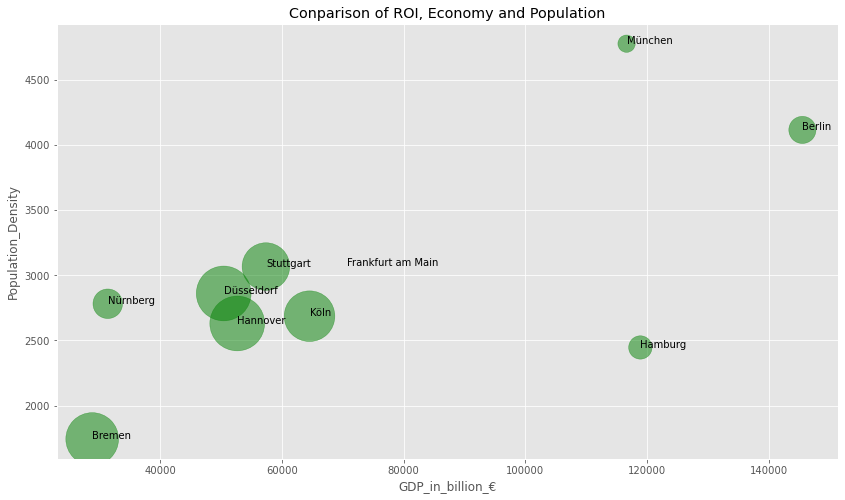

In [56]:
# normalize ROI
norm_ROI = (city_final['ROI_in_‰'] - city_final['ROI_in_‰'].min()) / (city_final['ROI_in_‰'].max() - city_final['ROI_in_‰'].min())
city_name = list(city_final.index.values)

result = city_final.plot(kind='scatter', x='GDP_in_billion_€',y='Population_Density',figsize=(14, 8),alpha=0.5,color='green',s=norm_ROI*3000)

for i in range(10):
    plt.annotate(city_final.index.values[i],xy=(city_final.iloc[i,0],city_final.iloc[i,1]))

plt.title('Conparison of ROI, Economy and Population') # add title to the plot

plt.show()

It’s quite interesting to visualize the result in graphs. While the megacities like Munich, Berlin and Hamburg don’t show a better ROI, the second-largest cities such as Hannover, Dusseldorf, Stuttgart and Cologne seem to be more promising. 

One possible explanation for this could be: although these super metropolises have much larger population and stronger economy, they are also quite crowded, which leads to very high property price and thus reduces the ROI. 

Finally, I used Folium to demonstrate these cities on the map of Germany, so that you can see where they are all located. Maybe this will help with your investment decision :)

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.11.0             |   py37h89c1867_0         168 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forg

setuptools-49.6.0    | 947 KB    | ##################################### | 100% 
grpcio-1.36.1        | 2.1 MB    | ##################################### | 100% 
ninja-1.10.2         | 2.4 MB    | ##################################### | 100% 
brunsli-0.1          | 200 KB    | ##################################### | 100% 
seaborn-0.11.1       | 4 KB      | ##################################### | 100% 
google-auth-oauthlib | 19 KB     | ##################################### | 100% 
libstdcxx-ng-9.3.0   | 4.0 MB    | ##################################### | 100% 
idna-2.10            | 52 KB     | ##################################### | 100% 
pexpect-4.8.0        | 47 KB     | ##################################### | 100% 
numexpr-2.7.2        | 199 KB    | ##################################### | 100% 
decorator-4.4.2      | 11 KB     | ##################################### | 100% 
libuuid-2.32.1       | 28 KB     | ##################################### | 100% 
libwebp-base-1.2.0   | 808 K

cytoolz-0.11.0       | 403 KB    | ##################################### | 100% 
ibm-wsrt-py37main-ke | 2 KB      | ##################################### | 100% 
xz-5.2.5             | 343 KB    | ##################################### | 100% 
glib-2.66.7          | 443 KB    | ##################################### | 100% 
olefile-0.46         | 32 KB     | ##################################### | 100% 
keras-preprocessing- | 34 KB     | ##################################### | 100% 
zlib-1.2.11          | 106 KB    | ##################################### | 100% 
yarl-1.6.3           | 141 KB    | ##################################### | 100% 
mkl-2020.4           | 215.6 MB  | ##################################### | 100% 
libcurl-7.71.1       | 312 KB    | ##################################### | 100% 
pyerfa-1.7.2         | 385 KB    | ##################################### | 100% 
psycopg2-2.8.6       | 168 KB    | ##################################### | 100% 
nbconvert-6.0.7      | 535 K

done
Folium installed and imported!


In [28]:
#define germany's geolocation coordinates
germany_latitude = 51.5167
germany_longitude = 9.9167

Munich_latitude = 48.137154
Munich_longitude = 11.576124    
Hamburg_latitude = 53.551086
Hamburg_longitude = 9.993682    
Berlin_latitude = 52.520008
Berlin_longitude = 13.404954

Stuttgart_latitude = 48.783333
Stuttgart_longitude = 9.183333   
Dusseldorf_latitude = 51.233334
Dusseldorf_longitude = 6.783333
Cologne_latitude = 50.933594
Cologne_longitude = 6.961899   
Hannover_latitude = 52.373920
Hannover_longitude = 9.735603

Bremen_latitude = 53.549999
Bremen_longitude = 8.583333   
Nuremberg_latitude = 49.460983
Nuremberg_longitude = 11.061859

locations = {'x': [Munich_latitude,Hamburg_latitude,Berlin_latitude,Stuttgart_latitude,Dusseldorf_latitude,Cologne_latitude,Hannover_latitude,Bremen_latitude, Nuremberg_latitude],
             'y': [Munich_longitude,Hamburg_longitude,Berlin_longitude,Stuttgart_longitude,Dusseldorf_longitude,Cologne_longitude,Hannover_longitude,Bremen_longitude, Nuremberg_longitude]}

geo = pd.DataFrame(locations, columns = ['x', 'y'])

# define the world map centered around Canada with a higher zoom level
germany_map = folium.Map(location=[germany_latitude, germany_longitude], zoom_start=5.6)

# display world map
germany_map


In [16]:
print(geo)

           x          y
0  48.137154  11.576124
1  53.551086   9.993682
2  52.520008  13.404954
3  48.783333   9.183333
4  51.233334   6.783333
5  50.933594   6.961899
6  52.373920   9.735603
7  53.549999   8.583333
8  49.460983  11.061859


In [29]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(geo.x, geo.y):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
    
# add incidents to map
germany_map.add_child(incidents)

## Conclusion <a name="conclusion"></a>

For me, this capstone project of IBM is more of a self-assessment-challenge than serves a real purpose. I learned a lot from this course and tried out different tools and skills.

At the end of this project, every single step of finishing this assignment comes to my mind: from data scraping, cleaning and preprocessing, transforming and analyzing to visualizing. How many times I ran into difficulties. How many times I then found useful advices from the internet and even borrowed some fragments of codes and adjusted them to my needs. It’s really hard work here, but it’s definitely worth it. 

All the tools are simply there. You just need to know how to use them at work or in everyday life. Even though you may sometimes have trouble, there are so many excellent generous people in the internet, who can help. 

My notebook with all technical codes for this project is also available to the public on Github. Feel free to contact me if you have any questions or comments. Looking forward to talking to you about data science!

## References <a name="references"></a>

* [1] https://de.wikipedia.org/wiki/Liste_der_deutschen_St%C3%A4dte_nach_Bruttoinlandsprodukt
* [2] https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland
* [3] https://www.wohnung.com/mietpreise
* [4] https://www.haus.de/geld-recht/immobilienpreise-deutschland-vergleich-2019